In [2]:
#-*-coding:utf-8-*-
import os
import random # Analysis
import datetime as dt # Analysis
import numpy as np # Analysis
import pandas as pd # Analysis
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings(action='ignore') # ignore warnings
# datafarme 보여주는 범위 설정

pd.options.display.max_columns=1000
pd.options.display.max_rows=200
pd.options.display.float_format = '{:.5f}'.format


df = {}

for i in range(2010, 2022):
    df[i] = pd.read_csv("csv_in_" + str(i) + ".csv")
    df[i].drop(labels=df[i][df[i]['아내지역코드'] == 80].index, inplace=True)
    df[i].drop(labels=df[i][df[i]['남편지역코드'] == 80].index, inplace=True)
    df[i].drop(labels=df[i][df[i]['아내직업코드'] == 99].index, inplace=True)
    df[i].drop(labels=df[i][df[i]['남편직업코드'] == 99].index, inplace=True)
    df[i].drop(labels=df[i][df[i]['아내결혼코드'] == 9].index, inplace=True)
    df[i].drop(labels=df[i][df[i]['남편결혼코드'] == 9].index, inplace=True)
    df[i].drop(labels=df[i][df[i]['남편교육코드'] == 9].index, inplace=True)
    df[i].drop(labels=df[i][df[i]['아내교육코드'] == 9].index, inplace=True)
for i in range(2010, 2021):
    df[i].drop(labels=df[i][df[i]['남편국적구분코드'] == 9].index, inplace=True)
    df[i].drop(labels=df[i][df[i]['아내국적구분코드'] == 9].index, inplace=True)

mandic = {1:10015,2:5011,3:4833,5:3325.5,6:2582,7:3510,8:3539,9:2494,13:0}
womandic = {1:8024,2:3136,3:3256,5:2119,6:2060,7:2156,8:2795,9:1897,13:0}

for i in range(2010,2022):
    df[i]['남편소득수준'] = df[i]['남편직업코드']
    df[i]['아내소득수준'] = df[i]['아내직업코드']
    
    for j in mandic.keys():
        df[i]['남편소득수준'].replace(j,mandic[j], inplace=True)
        df[i]['아내소득수준'].replace(j,womandic[j], inplace=True)
        
#기본전처리. 
#연도삭제
plt.rcParams['font.family'] = 'HYGraphic-Medium' # 깨짐방지
#교육수준 통합 필요.


# 3 -> 중졸 이히
# 4 -> 고졸
# 5 -> 대졸
# 6 -> 대학원졸
for i in range(2010, 2022):
    df[i].drop(df[i][df[i]['남편교육코드'] >= 7].index, inplace=True)
    df[i].loc[df[i]["남편교육코드"] == 1, "남편교육코드"] = 3
    df[i].loc[df[i]["남편교육코드"] == 2, "남편교육코드"] = 3


In [3]:
dic = {1:0.038,2:0.123,3:0.2,4:0.285,5:0.367,
6:0.452,7:0.534,8:0.619,9:0.704,10:0.786,11:0.871,12:0.953}
for i in range(2010,2022):
    for j in dic.keys():
        df[i].loc[df[i]['실제결혼월'] == j,'남편출생년도'] = ((df[i]['실제결혼연도']+dic[j])-df[i]['남편연령']).apply(int)
        df[i].loc[df[i]['실제결혼월'] == j,'아내출생년도'] = ((df[i]['실제결혼연도']+dic[j])-df[i]['아내연령']).apply(int)


In [4]:
df[2021].head(100)

,신고연도,신고월,신고일,남편지역코드,아내지역코드,실제결혼연도,실제결혼월,남편직업코드,아내직업코드,남편교육코드,아내교육코드,남편결혼코드,아내결혼코드,남편연령,아내연령,남편국적구분코드,남편국적코드,아내국적구분코드,아내국적코드,남편소득수준,아내소득수준,남편출생년도,아내출생년도
0,2021,5,13,35,35,2021,5,3,2,4,5,1,1,36.93600,34.94700,NaN,NaN,NaN,NaN,4833.00000,3136,1984.00000,1986.00000
1,2021,4,5,31,34,2021,4,13,13,5,5,1,1,32.75800,32.22700,NaN,NaN,NaN,NaN,0.00000,0,1988.00000,1989.00000
2,2021,4,5,31,34,2021,3,3,13,5,5,1,1,35.13900,29.33900,NaN,NaN,NaN,NaN,4833.00000,0,1986.00000,1991.00000
4,2021,6,15,23,23,2021,6,7,5,3,3,1,2,61.36700,64.55600,NaN,NaN,NaN,NaN,3510.00000,2119,1960.00000,1956.00000
5,2021,6,11,31,31,2021,4,2,2,5,6,1,1,33.49000,33.99700,NaN,NaN,NaN,NaN,5011.00000,3136,1987.00000,1987.00000
7,2021,4,5,31,34,2021,1,3,2,5,5,1,1,29.65400,27.78900,NaN,NaN,NaN,NaN,4833.00000,3136,1991.00000,1993.00000
8,2021,5,21,25,25,2021,5,2,5,4,4,3,3,32.06000,30.79400,NaN,NaN,NaN,NaN,5011.00000,2119,1989.00000,1990.00000
9,2021,5,13,35,35,2021,5,5,5,5,5,1,1,25.38300,25.88200,NaN,NaN,NaN,NaN,3325.50000,2119,1995.00000,1995.00000
10,2021,6,15,23,23,2021,6,7,3,5,5,1,1,28.13100,27.32300,NaN,NaN,NaN,NaN,3510.00000,3256,1993.00000,1994.00000
11,2021,4,5,31,33,2021,4,13,2,6,5,1,1,30.07100,31.51700,NaN,NaN,NaN,NaN,0.00000,3136,1991.00000,1989.00000


In [5]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
import statsmodels.api as sm

In [6]:
for year in range(2010,2022):
    # 소득  (연속)
    # 소득 차이 (연속)
    # 여성결혼연령 (연속)
    # 연상혼
    df[year].loc[round(df[year]['남편연령']) < round(df[year]['아내연령']), "연상혼여부이전기준"] = 1
    df[year].loc[round(df[year]['남편연령']) >= round(df[year]['아내연령']), "연상혼여부이전기준"] = 0
    df[year].loc[df[year]['남편출생년도'] > df[year]['아내출생년도'], "연상혼여부"] = 1
    df[year].loc[df[year]['남편출생년도'] <= df[year]['아내출생년도'], "연상혼여부"] = 0
    df[year].loc[df[year]['남편출생년도'] == df[year]['아내출생년도'], "동갑혼여부"] = 1
    df[year].loc[df[year]['남편출생년도'] != df[year]['아내출생년도'], "동갑혼여부"] = 0
    df[year].loc[df[year]['남편출생년도'] < df[year]['아내출생년도'], "연하혼여부"] = 1
    df[year].loc[df[year]['남편출생년도'] >= df[year]['아내출생년도'], "연하혼여부"] = 0

    # 아내 대도시
    df[year].loc[df[year]['아내지역코드'].isin([11, 21, 22, 23, 24, 25]), 
    "아내대도시여부"] = 1
    df[year].loc[~df[year]['아내지역코드'].isin([11, 21, 22, 23, 24, 25]), 
    "아내대도시여부"] = 0

    # 남편 대도시
    df[year].loc[df[year]['남편지역코드'].isin([11, 21, 22, 23, 24, 25]),
    "남편대도시여부"] = 1
    df[year].loc[~df[year]['남편지역코드'].isin([11, 21, 22, 23, 24, 25]),
    "남편대도시여부"] = 0
    df[year].loc[df[year]['남편지역코드'].isin([11,23,31]),
    "남편수도권여부"] = 1
    df[year].loc[~df[year]['남편지역코드'].isin([11,23,31]),
    "남편수도권여부"] = 0
    df[year].loc[df[year]['아내지역코드'].isin([11,23,31]),
    "아내수도권여부"] = 1
    df[year].loc[~df[year]['아내지역코드'].isin([11,23,31]),
    "아내수도권여부"] = 0
    # 남자 결혼 종류

    # 여자 결혼 종류

    # 아내 재혼 여부
    df[year].loc[df[year]['아내결혼코드'] == 1,
    "아내재혼여부"] = 0
    df[year].loc[df[year]['아내결혼코드'] != 1,
    "아내재혼여부"]= 1

    # 남편 재혼 여부
    df[year].loc[df[year]['남편결혼코드'] == 1, 
    "남편재혼여부"] = 0
    df[year].loc[df[year]['남편결혼코드'] != 1, 
    "남편재혼여부"]= 1

    # 결혼 종류 차이 여부
    df[year].loc[df[year]['남편재혼여부'] == df[year]['아내재혼여부'], 
    "결혼종류차이여부"] = 1
    df[year].loc[df[year]['남편재혼여부'] != df[year]['아내재혼여부'],
    "결혼종류차이여부"]= 0

    # 강혼 여부
    df[year].loc[df[year]['아내교육코드'] > df[year]['남편교육코드'],
    "강혼여부"] = 1
    df[year].loc[~(df[year]['아내교육코드'] > df[year]['남편교육코드']),
    "강혼여부"] = 0

    # 소득 차
    df[year]['소득차'] = df[year]['아내소득수준'] - df[year]['남편소득수준']

    df[year]['아내연령제곱'] = df[year]['아내연령'] ** 2
    df[year]['남편연령제곱'] = df[year]['남편연령'] ** 2

    # 아내 무직 여부
    df[year].loc[df[year]['아내직업코드'] == 13, "아내무직여부"] = 1
    df[year].loc[df[year]['아내직업코드'] != 13, "아내무직여부"] = 0

    # 남편 무직 여부
    df[year].loc[df[year]['남편직업코드'] == 13, "남편무직여부"] = 1
    df[year].loc[df[year]['남편직업코드'] != 13, "남편무직여부"] = 0

    df[year].loc[df[year]['남편지역코드'] == df[year]['아내지역코드'], "동일지역여부"] = 1
    df[year].loc[df[year]['남편지역코드'] != df[year]['아내지역코드'], "동일지역여부"] = 0

    df[year].loc[df[year]['아내교육코드'] == 4, "아내고졸여부"] = 1
    df[year].loc[df[year]['아내교육코드'] != 4, "아내고졸여부"] = 0
    df[year].loc[df[year]['남편교육코드'] == 4, "남편고졸여부"] = 1
    df[year].loc[df[year]['남편교육코드'] != 4, "남편고졸여부"] = 0

    df[year].loc[df[year]['아내교육코드'] == 5, "아내대졸여부"] = 1
    df[year].loc[df[year]['아내교육코드'] !=5, "아내대졸여부"] = 0
    df[year].loc[df[year]['남편교육코드'] == 5, "남편대졸여부"] = 1
    df[year].loc[df[year]['남편교육코드'] !=5, "남편대졸여부"] = 0

    df[year].loc[df[year]['남편교육코드'] == 6, "남편대학원졸여부"] = 1
    df[year].loc[df[year]['남편교육코드'] !=6, "남편대학원졸여부"] = 0
    df[year].loc[df[year]['아내교육코드'] == 6, "아내대학원졸여부"] = 1
    df[year].loc[df[year]['아내교육코드'] !=6, "아내대학원졸여부"] = 0

    df[year].loc[df[year]['남편교육코드'] ==df[year]['아내교육코드'] , "동질혼여부"] = 1
    df[year].loc[df[year]['남편교육코드'] !=df[year]['아내교육코드'] , "동질혼여부"] = 0
    

for year in range(2010,2022):
    df[year]['아내국제결혼여부'] = 0
    df[year].loc[((df[year]['아내국적구분코드']>= 2)&(df[year]['신고연도']!=2021)), "아내국제결혼여부"] = 1
    df[year]['남편국제결혼여부'] = 0
    df[year].loc[((df[year]['남편국적구분코드']>=2)&(df[year]['신고연도']!=2021)), "남편국제결혼여부"] = 1
    df[year].loc[((df[year]['아내지역코드']>80)&(df[year]['신고연도'] == 2021)), "아내국제결혼여부"] = 1
    df[year].loc[(~(df[year]['아내지역코드']>80)&(df[year]['신고연도'] == 2021)), "아내국제결혼여부"] = 0
    df[year].loc[((df[year]['남편지역코드']>80)&(df[year]['신고연도'] == 2021)), "남편국제결혼여부"] = 1
    df[year].loc[(~(df[year]['남편지역코드']>80)&(df[year]['신고연도'] == 2021)), "남편국제결혼여부"] = 0

In [7]:
len(df[2020].loc[(df[2020]['연상혼여부이전기준'] != df[2020]['연상혼여부'])])

7099

In [8]:
df[2020]

,신고연도,신고월,신고일,남편지역코드,아내지역코드,실제결혼연도,실제결혼월,남편직업코드,아내직업코드,남편교육코드,아내교육코드,남편결혼코드,아내결혼코드,남편연령,아내연령,남편국적구분코드,남편국적코드,아내국적구분코드,아내국적코드,남편소득수준,아내소득수준,남편출생년도,아내출생년도,연상혼여부이전기준,연상혼여부,동갑혼여부,연하혼여부,아내대도시여부,남편대도시여부,남편수도권여부,아내수도권여부,아내재혼여부,남편재혼여부,결혼종류차이여부,강혼여부,소득차,아내연령제곱,남편연령제곱,아내무직여부,남편무직여부,동일지역여부,아내고졸여부,남편고졸여부,아내대졸여부,남편대졸여부,남편대학원졸여부,아내대학원졸여부,동질혼여부,아내국제결혼여부,남편국제결혼여부
0,2020,12,1,31,31,2020,12,13,13,4,4,1,1,24.84900,26.37200,1.00000,NaN,1.00000,NaN,0.00000,0,1996.00000,1994.00000,1.00000,1.00000,0.00000,0.00000,0.00000,0.00000,1.00000,1.00000,0.00000,0.00000,1.00000,0.00000,0.00000,695.48238,617.47280,1.00000,1.00000,1.00000,1.00000,1.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0,0
1,2020,12,3,22,22,2020,12,5,5,4,4,1,1,32.01900,29.26500,1.00000,NaN,1.00000,NaN,3325.50000,2119,1988.00000,1991.00000,0.00000,0.00000,0.00000,1.00000,1.00000,1.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,-1206.50000,856.44023,1025.21636,0.00000,0.00000,1.00000,1.00000,1.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0,0
2,2020,12,3,22,22,2020,12,5,2,5,5,1,1,31.84300,32.24100,1.00000,NaN,1.00000,NaN,3325.50000,3136,1989.00000,1988.00000,0.00000,1.00000,0.00000,0.00000,1.00000,1.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,-189.50000,1039.48208,1013.97665,0.00000,0.00000,1.00000,0.00000,0.00000,1.00000,1.00000,0.00000,0.00000,1.00000,0,0
3,2019,11,11,23,11,2020,6,3,3,5,5,1,1,29.70900,25.51500,1.00000,NaN,1.00000,NaN,4833.00000,3256,1990.00000,1994.00000,0.00000,0.00000,0.00000,1.00000,1.00000,1.00000,1.00000,1.00000,0.00000,0.00000,1.00000,0.00000,-1577.00000,651.01522,882.62468,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,1.00000,0.00000,0.00000,1.00000,0,0
4,2020,12,7,25,25,2020,11,3,3,5,5,1,1,39.08700,32.00000,1.00000,NaN,1.00000,NaN,4833.00000,3256,1981.00000,1988.00000,0.00000,0.00000,0.00000,1.00000,1.00000,1.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,-1577.00000,1024.00000,1527.79357,0.00000,0.00000,1.00000,0.00000,0.00000,1.00000,1.00000,0.00000,0.00000,1.00000,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
170860,2020,7,21,31,31,2020,4,3,5,4,5,1,1,37.49500,36.08400,1.00000,NaN,1.00000,NaN,4833.00000,2119,1982.00000,1984.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,1.00000,1.00000,0.00000,0.00000,1.00000,1.00000,-2714.00000,1302.05506,1405.87502,0.00000,0.00000,1.00000,0.00000,1.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0,0
170863,2020,8,25,38,38,2020,4,5,5,4,5,1,1,38.10400,35.14500,1.00000,NaN,1.00000,NaN,3325.50000,2119,1982.00000,1985.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,1.00000,-1206.50000,1235.17103,1451.91482,0.00000,0.00000,1.00000,0.00000,1.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0,0
170865,2020,7,21,31,31,2020,4,3,5,5,5,1,1,32.39700,35.98900,1.00000,NaN,1.00000,NaN,4833.00000,2119,1987.00000,1984.00000,1.00000,1.00000,0.00000,0.00000,0.00000,0.00000,1.00000,1.00000,0.00000,0.00000,1.00000,0.00000,-2714.00000,1295.20812,1049.56561,0.00000,0.00000,1.00000,0.00000,0.00000,1.00000,1.00000,0.00000,0.00000,1.00000,0,0
170866,2020,7,21,37,32,2020,7,7,1,4,4,3,2,46.88700,46.75000,1.00000,NaN,1.00000,NaN,3510.00000,8024,1973.00000,1973.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,1.00000,1.00000,0.00000,4514.00000,2185.56250,2198.39077,0.00000,0.00000,0.00000,1.00000,1.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0,0


In [9]:
# k = len(df[2018][df[2018]['강혼'] == 1])
# l = len(df[2018][df[2018]['연상혼'] == 1])
# m = len(df[2018][(df[2018]['연상혼'] == 1)&(df[2018]['강혼'] == 1)])
# n = len(df[2018])
# print(k,l,m,n)

In [92]:
from pylab import plot, show
from pylab import title, xlabel, ylabel
li = []
li2 = []
li3 = []
li4 = []
li5 = []
for i in range(2010,2022):
    m = len(df[i][df[i]['강혼여부'] == 1])
    l = len(df[i][df[i]['연상혼여부'] == 1])
    d = len(df[i][df[i]['연하혼여부'] == 1])
    d2 = len(df[i][df[i]['동갑혼여부'] == 1])
    n = len(df[i])
    li.append(m/n)
    li2.append(l/n)
    li3.append(d/n)
    li4.append(d2/n)
    li5.append(l)

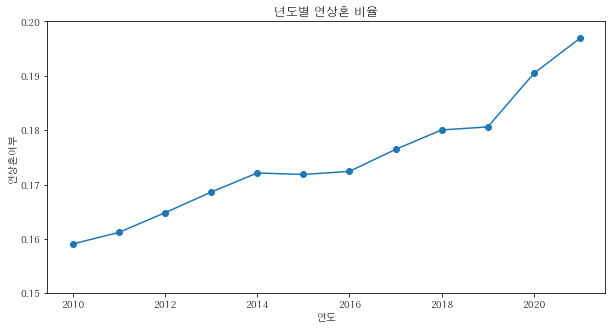

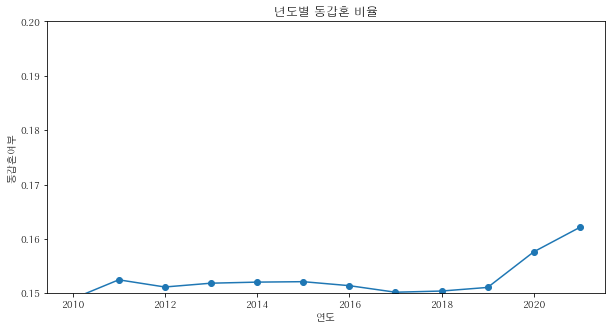

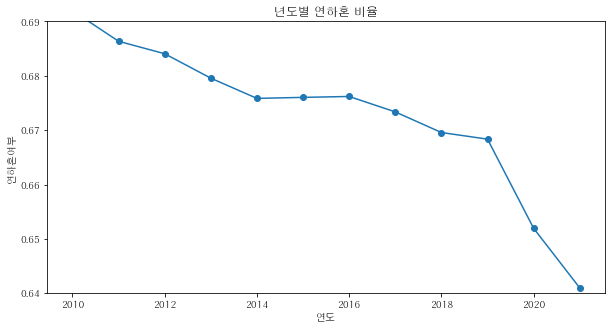

In [86]:
plt.figure(figsize=(10,5),facecolor= 'white')
title('년도별 연상혼 비율')
xlabel('연도')
ylabel('연상혼여부')
x=range(2010,2022)
y = li2
plt.ylim(0.15,0.2)
plot(x, y, marker="o")
plt.show()
plt.figure(figsize=(10,5),facecolor= 'white')
title('년도별 동갑혼 비율')
xlabel('연도')
ylabel('동갑혼여부')
x=range(2010,2022)
y = li4
plt.ylim(0.15,0.2)
plot(x, y, marker="o")
plt.show()
plt.figure(figsize=(10,5),facecolor= 'white')
title('년도별 연하혼 비율')
xlabel('연도')
ylabel('연하혼여부')
x=range(2010,2022)
y = li3
plt.ylim(0.64,0.69)
plot(x, y, marker="o")
plt.show()


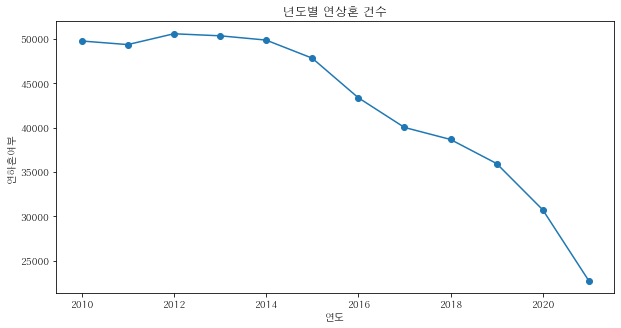

In [93]:
plt.figure(figsize=(10,5),facecolor= 'white')
title('년도별 연상혼 건수')
xlabel('연도')
ylabel('연하혼여부')
x=range(2010,2022)
y = li5
plot(x, y, marker="o")
plt.show()

In [15]:
# import scipy
# crosstab = pd.crosstab(df[2019]['연상혼'], df[2019]["남편 대도시 유무"])
# # pd.crosstab(열1, 열2) -> 열1과 열2를 각각 범주로 하는 표 생성
# c, p, dof, expected = scipy.stats.chi2_contingency(crosstab)
# # scipy.stats.chi2_contigency(crosstab) -> 카이제곱 검정 실행

# print(f"-------------- {2019} 연도 남편 대도시 거주 여부 -연상혼 카이제곱 검정 -----------------")
# print("c-val : " + str(c))
# print("P-val : " + str(p))
# print("dof : " + str(dof))

In [25]:
dfa = df[2021].append(df[2020]).append(df[2019]).append(df[2018]).append(df[2017]).append(df[2016]).append(df[2015]).append(df[2014])

In [26]:
dfa.loc[(dfa['실제결혼연도'] == 2014)|(dfa['실제결혼연도'] == 2015), "시점1"] = 1
dfa.loc[(dfa['실제결혼연도'] != 2014)&(dfa['실제결혼연도'] != 2015), "시점1"] = 0
dfa.loc[(dfa['실제결혼연도'] == 2016)|(dfa['실제결혼연도'] == 2017), "시점2"] = 1
dfa.loc[(dfa['실제결혼연도'] != 2016)&(dfa['실제결혼연도'] != 2017), "시점2"] = 0
dfa.loc[(dfa['실제결혼연도'] == 2018)|(dfa['실제결혼연도'] == 2019), "시점3"] = 1
dfa.loc[(dfa['실제결혼연도'] != 2018)&(dfa['실제결혼연도'] != 2019), "시점3"] = 0
dfa.loc[(dfa['실제결혼연도'] == 2020)|(dfa['실제결혼연도'] == 2021), "시점4"] = 1
dfa.loc[(dfa['실제결혼연도'] != 2020)&(dfa['실제결혼연도'] != 2021), "시점4"] = 0


In [27]:
dfa.loc[dfa['실제결혼연도'] == 2015, "15년여부"] = 1
dfa.loc[dfa['실제결혼연도'] != 2015, "15년여부"] = 0
dfa.loc[dfa['실제결혼연도'] == 2016, "16년여부"] = 1
dfa.loc[dfa['실제결혼연도'] != 2016, "16년여부"] = 0
dfa.loc[dfa['실제결혼연도'] == 2017, "17년여부"] = 1
dfa.loc[dfa['실제결혼연도'] != 2017, "17년여부"] = 0
dfa.loc[dfa['실제결혼연도'] == 2018, "18년여부"] = 1
dfa.loc[dfa['실제결혼연도'] != 2018, "18년여부"] = 0
dfa.loc[dfa['실제결혼연도'] == 2019, "19년여부"] = 1
dfa.loc[dfa['실제결혼연도'] != 2019, "19년여부"] = 0
dfa.loc[dfa['실제결혼연도'] == 2020, "20년여부"] = 1
dfa.loc[dfa['실제결혼연도'] != 2020, "20년여부"] = 0
dfa.loc[dfa['실제결혼연도'] == 2021, "21년여부"] = 1
dfa.loc[dfa['실제결혼연도'] != 2021, "21년여부"] = 0
dfa.loc[dfa['실제결혼연도'] >=2020, "코로나여부"] = 1
dfa.loc[dfa['실제결혼연도'] <2020, "코로나여부"] = 0

In [28]:
#아내 출생코호트

min = 1970
step = 5
for y in range (1970, 2000, step):
    dfa.loc[dfa['아내출생년도'].between(y, y + 5), "아내코호트"] = f"{y} to {y + 5}" 

for y in range (1970, 2000, step):
    dfa.loc[dfa['아내출생년도'].between(y, y + 5), "아내코호트"] = f"{y} to {y + 5}" 

dfa.loc[dfa['아내출생년도']<1970,'아내코호트'] = '1970 to 1975 (아내)'
dfa.loc[dfa['아내출생년도']>=2000,'아내코호트'] = '1995 to 2000 (아내)'

for code in dfa['아내코호트'].unique():
    dfa.loc[dfa['아내코호트'] == code, str(code) + " (아내)"] = 1
    dfa.loc[dfa['아내코호트'] != code, str(code) + " (아내)"] = 0



#남편 출생코호트

min = 1970
step = 5

for y in range (1970, 2000, step):
    dfa.loc[dfa['남편출생년도'].between(y, y + 5), "남편코호트"] = f"{y} to {y + 5}" 

dfa.loc[dfa['남편출생년도']<1970,'남편코호트'] = '1970 to 1975 (남편)'
dfa.loc[dfa['남편출생년도']>=2000,'남편코호트'] = '1995 to 2000 (남편)'

for code in dfa['남편코호트'].unique():
    dfa.loc[dfa['남편코호트'] == code, str(code) + " (남편)"] = 1
    dfa.loc[dfa['남편코호트'] != code, str(code) + " (남편)"] = 0



In [30]:
dfa.head(40)

,신고연도,신고월,신고일,남편지역코드,아내지역코드,실제결혼연도,실제결혼월,남편직업코드,아내직업코드,남편교육코드,아내교육코드,남편결혼코드,아내결혼코드,남편연령,아내연령,남편국적구분코드,남편국적코드,아내국적구분코드,아내국적코드,남편소득수준,아내소득수준,남편출생년도,아내출생년도,연상혼여부이전기준,연상혼여부,동갑혼여부,연하혼여부,아내대도시여부,남편대도시여부,남편수도권여부,아내수도권여부,아내재혼여부,남편재혼여부,결혼종류차이여부,강혼여부,소득차,아내연령제곱,남편연령제곱,아내무직여부,남편무직여부,동일지역여부,아내고졸여부,남편고졸여부,아내대졸여부,남편대졸여부,남편대학원졸여부,아내대학원졸여부,동질혼여부,아내국제결혼여부,남편국제결혼여부,시점1,시점2,시점3,시점4,15년여부,16년여부,17년여부,18년여부,19년여부,20년여부,21년여부,코로나여부,아내코호트,1985 to 1990 (아내),1990 to 1995 (아내),1970 to 1975 (아내) (아내),1995 to 2000 (아내),1975 to 1980 (아내),1980 to 1985 (아내),1970 to 1975 (아내),1995 to 2000 (아내) (아내),남편코호트,1980 to 1985 (남편),1985 to 1990 (남편),1970 to 1975 (남편) (남편),1990 to 1995 (남편),1995 to 2000 (남편),1970 to 1975 (남편),1975 to 1980 (남편),1995 to 2000 (남편) (남편)
0,2021,5,13,35,35,2021,5,3,2,4,5,1,1,36.93600,34.94700,NaN,NaN,NaN,NaN,4833.00000,3136,1984.00000,1986.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,1.00000,-1697.00000,1221.29281,1364.26810,0.00000,0.00000,1.00000,0.00000,1.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0,0,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,1.00000,1985 to 1990,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1980 to 1985,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
1,2021,4,5,31,34,2021,4,13,13,5,5,1,1,32.75800,32.22700,NaN,NaN,NaN,NaN,0.00000,0,1988.00000,1989.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,1038.57953,1073.08656,1.00000,1.00000,0.00000,0.00000,0.00000,1.00000,1.00000,0.00000,0.00000,1.00000,0,0,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,1.00000,1985 to 1990,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1985 to 1990,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
2,2021,4,5,31,34,2021,3,3,13,5,5,1,1,35.13900,29.33900,NaN,NaN,NaN,NaN,4833.00000,0,1986.00000,1991.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,1.00000,0.00000,-4833.00000,860.77692,1234.74932,1.00000,0.00000,0.00000,0.00000,0.00000,1.00000,1.00000,0.00000,0.00000,1.00000,0,0,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,1.00000,1990 to 1995,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1985 to 1990,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
4,2021,6,15,23,23,2021,6,7,5,3,3,1,2,61.36700,64.55600,NaN,NaN,NaN,NaN,3510.00000,2119,1960.00000,1956.00000,1.00000,1.00000,0.00000,0.00000,1.00000,1.00000,1.00000,1.00000,1.00000,0.00000,0.00000,0.00000,-1391.00000,4167.47714,3765.90869,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0,0,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,1.00000,1970 to 1975 (아내),0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1970 to 1975 (남편),0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000
5,2021,6,11,31,31,2021,4,2,2,5,6,1,1,33.49000,33.99700,NaN,NaN,NaN,NaN,5011.00000,3136,1987.00000,1987.00000,1.00000,0.00000,1.00000,0.00000,0.00000,0.00000,1.00000,1.00000,0.00000,0.00000,1.00000,1.00000,-1875.00000,1155.79601,1121.58010,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,1.00000,0.00000,1.00000,0.00000,0,0,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,1.00000,1985 to 1990,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1985 to 1990,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
7,2021,4,5,31,34,2021,1,3,2,5,5,1,1,29.65400,27.78900,NaN,NaN,NaN,NaN,4833.00000,3136,1991.00000,1993.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,1.00000,0.00000,-1697.00000,772.22852,879.35972,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,1.00000,0.00000,0.00000,1.00000,0,0,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00

In [ ]:
dfb = df[2020].append(df[2019]).append(df[2018]).append(df[2017]).append(df[2016]).append(df[2015]).append(df[2014])

In [ ]:
dfb.loc[dfb['실제결혼연도'] == 2015, "15년여부"] = 1
dfb.loc[dfb['실제결혼연도'] != 2015, "15년여부"] = 0
dfb.loc[dfb['실제결혼연도'] == 2016, "16년여부"] = 1
dfb.loc[dfb['실제결혼연도'] != 2016, "16년여부"] = 0
dfb.loc[dfb['실제결혼연도'] == 2017, "17년여부"] = 1
dfb.loc[dfb['실제결혼연도'] != 2017, "17년여부"] = 0
dfb.loc[dfb['실제결혼연도'] == 2018, "18년여부"] = 1
dfb.loc[dfb['실제결혼연도'] != 2018, "18년여부"] = 0
dfb.loc[dfb['실제결혼연도'] == 2019, "19년여부"] = 1
dfb.loc[dfb['실제결혼연도'] != 2019, "19년여부"] = 0
dfb.loc[dfb['실제결혼연도'] == 2020, "20년여부"] = 1
dfb.loc[dfb['실제결혼연도'] != 2020, "20년여부"] = 0

dfb.loc[dfb['실제결혼연도'] >=2020, "코로나여부"] = 1
dfb.loc[dfb['실제결혼연도'] <2020, "코로나여부"] = 0

In [ ]:
features4 = dfb[['소득차','남편수도권여부','아내수도권여부','아내고졸여부','아내대졸이상여부',
'동일지역여부','남편재혼여부','아내연령','아내국제결혼여부','남편국제결혼여부',
'15년여부','16년여부','17년여부','18년여부','19년여부','20년여부']]
oldmarriage4= dfb['연상혼여부']
scaler = StandardScaler()
features4= scaler.fit_transform(features4)
model = sm.Logit(oldmarriage4,features4)
results = model.fit()
print('연상혼으로 로지스틱 회귀분석')
print(results.summary(xname = ['소득차','남편수도권여부','아내수도권여부','아내고졸여부','아내대졸이상여부',
'동일지역여부','남편재혼여부','아내연령','아내국제결혼여부','남편국제결혼여부',
'15년여부','16년여부','17년여부','18년여부','19년여부','20년여부']))
print(results.aic)

Optimization terminated successfully.
         Current function value: 0.673746
         Iterations 5
연상혼으로 로지스틱 회귀분석
                           Logit Regression Results                           
Dep. Variable:                  연상혼여부   No. Observations:              1558797
Model:                          Logit   Df Residuals:                  1558781
Method:                           MLE   Df Model:                           15
Date:                Sat, 13 Aug 2022   Pseudo R-squ.:                 -0.1845
Time:                        21:40:23   Log-Likelihood:            -1.0502e+06
converged:                       True   LL-Null:                   -8.8668e+05
Covariance Type:            nonrobust   LLR p-value:                     1.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
소득차            0.0763      0.002     46.278      0.000       0.073       0.080
남편수도권여부      

In [ ]:
k = df[2020][((df[2020]['아내지역코드'] > 80)|(df[2020]['남편지역코드'] > 80))]
len(k)

8355

In [ ]:
k = df[2020][(df[2020]['아내국적구분코드'] > 1)|(df[2020]['남편국적구분코드'] > 1)]
len(k)

9288

In [ ]:
k = df[2020][((df[2020]['아내국적구분코드'] > 1)|(df[2020]['남편국적구분코드'] > 1))&((df[2020]['아내지역코드'] > 80)|(df[2020]['남편지역코드'] > 80))]
len(k)
# 88%의 외국결혼 케이스는 국제결혼임.

7393

In [ ]:
m = df[2020][(~((df[2020]['아내국적구분코드'] > 1)|(df[2020]['남편국적구분코드'] > 1)))&((df[2020]['아내지역코드'] > 80)|(df[2020]['남편지역코드'] > 80))]
print(len(m))
m.head(100)

962


,신고월,신고일,남편지역코드,아내지역코드,실제결혼연도,실제결혼월,남편직업코드,아내직업코드,남편교육코드,아내교육코드,남편결혼코드,아내결혼코드,남편연령,아내연령,남편국적구분코드,남편국적코드,아내국적구분코드,아내국적코드,남편소득수준,아내소득수준,연상혼여부,아내대도시여부,남편대도시여부,남편수도권여부,아내수도권여부,아내재혼여부,남편재혼여부,결혼종류차이여부,강혼여부,소득차,아내연령제곱,남편연령제곱,아내무직여부,남편무직여부,동일지역여부,아내고졸여부,남편고졸여부,아내대졸이상여부,남편대졸이상여부,동질혼여부,아내국제결혼여부,남편국제결혼여부
9768,12,28,11,83,2020,12,7,7,5,5,1,3,45.78000,40.42100,1.00000,NaN,1.00000,NaN,3510.00000,2156,0.00000,0.00000,1.00000,1.00000,0.00000,1.00000,0.00000,0.00000,0.00000,-1354.00000,1633.85724,2095.80840,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,1.00000,1.00000,1.00000,1.00000
38261,4,30,31,81,2020,4,1,13,4,4,1,1,33.23800,18.50900,NaN,NaN,NaN,NaN,10015.00000,0,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,1.00000,0.00000,-10015.00000,342.58308,1104.76464,1.00000,0.00000,0.00000,1.00000,1.00000,0.00000,0.00000,1.00000,0.00000,0.00000
38262,4,30,31,81,2020,8,5,13,5,4,1,1,39.09800,23.30900,NaN,NaN,NaN,NaN,3325.50000,0,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,1.00000,0.00000,-3325.50000,543.30948,1528.65360,1.00000,0.00000,0.00000,1.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000
38285,4,30,81,11,2020,1,7,5,5,6,3,3,56.32000,55.71200,NaN,NaN,NaN,NaN,3510.00000,2119,0.00000,1.00000,0.00000,0.00000,1.00000,1.00000,1.00000,1.00000,1.00000,-1391.00000,3103.82694,3171.94240,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,1.00000,0.00000,0.00000,0.00000
38316,4,30,37,81,2020,12,9,7,5,5,3,3,49.48400,49.85200,NaN,NaN,NaN,NaN,2494.00000,2156,1.00000,0.00000,0.00000,0.00000,0.00000,1.00000,1.00000,1.00000,0.00000,-338.00000,2485.22190,2448.66626,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,1.00000,1.00000,0.00000,0.00000
38317,4,30,37,81,2020,5,7,13,5,5,1,1,32.31500,25.09500,NaN,NaN,NaN,NaN,3510.00000,0,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,-3510.00000,629.75902,1044.25922,1.00000,0.00000,0.00000,0.00000,0.00000,1.00000,1.00000,1.00000,0.00000,0.00000
38367,4,30,23,81,2020,4,5,13,3,3,3,2,62.30400,64.39100,NaN,NaN,NaN,NaN,3325.50000,0,1.00000,0.00000,1.00000,1.00000,0.00000,1.00000,1.00000,1.00000,0.00000,-3325.50000,4146.20088,3881.78842,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000
38368,4,30,22,81,2020,6,13,3,5,5,1,1,28.94200,28.64600,NaN,NaN,NaN,NaN,0.00000,3256,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,3256.00000,820.59332,837.63936,0.00000,1.00000,0.00000,0.00000,0.00000,1.00000,1.00000,1.00000,0.00000,0.00000
38468,4,5,31,81,2020,5,8,9,5,4,1,3,33.04100,37.91700,NaN,NaN,NaN,NaN,3539.00000,1897,1.00000,0.00000,0.00000,1.00000,0.00000,1.00000,0.00000,0.00000,0.00000,-1642.00000,1437.69889,1091.70768,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000
38474,4,5,32,81,2020,4,7,13,3,4,1,1,54.79700,40.03200,NaN,NaN,NaN,NaN,3510.00000,0,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,1.00000,-3510.00000,1602.56102,3002.71121,1.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000


In [ ]:

print(dfa.groupby(['아내재혼여부','남편재혼여부'])['연상혼여부'].mean())
dfa.groupby(['아내재혼여부','남편재혼여부'])['강혼여부'].mean()


아내재혼여부   남편재혼여부 
0.00000  0.00000   0.24101
         1.00000   0.15312
1.00000  0.00000   0.43455
         1.00000   0.25113
Name: 연상혼여부, dtype: float64


아내재혼여부   남편재혼여부 
0.00000  0.00000   0.17640
         1.00000   0.21612
1.00000  0.00000   0.16587
         1.00000   0.14002
Name: 강혼여부, dtype: float64

In [36]:
dfc = dfa[dfa['아내국제결혼여부'] == 0] 
dfc = dfc[dfc['남편국제결혼여부'] == 0] 

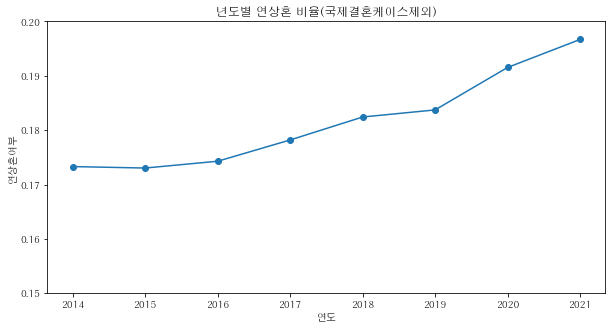

In [44]:
list1 = []
list2 = []
list3 = []
list4 = []
for i in range(2014,2022):
    a = dfc[dfc['실제결혼연도'] == i]
    m = len(a)
    n = len(a[a['연상혼여부'] == 1])
    k = len(a[a['강혼여부'] == 1])
    l = len(a[a['동갑혼여부'] == 1])
    w = len(a[a['연하혼여부'] == 1])
    list1.append(n/m)
    list2.append(l/m)
    list3.append(w/m)
    list4.append(k/m)

plt.figure(figsize=(10,5),facecolor= 'white')
title('년도별 연상혼 비율(국제결혼케이스제외)')
xlabel('연도')
ylabel('연상혼여부')
x=range(2014,2022)
y = list1
plt.ylim(0.15,0.2)
plot(x, y, marker="o")
plt.show()


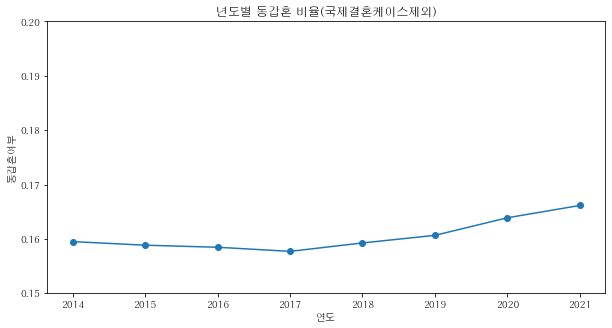

In [50]:
plt.figure(figsize=(10,5),facecolor= 'white')
title('년도별 동갑혼 비율(국제결혼케이스제외)')
xlabel('연도')
ylabel('동갑혼여부')
x=range(2014,2022)
y = list2
plt.ylim(0.15,0.2)
plot(x, y, marker="o")
plt.show()


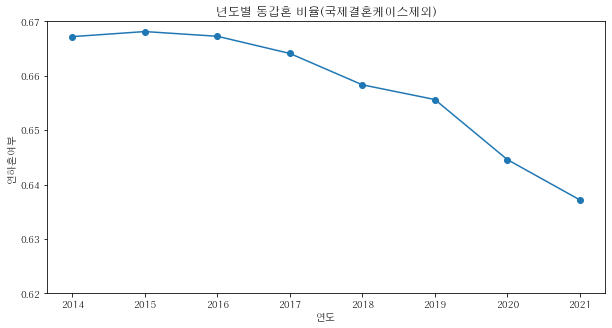

In [56]:
plt.figure(figsize=(10,5),facecolor= 'white')
title('년도별 동갑혼 비율(국제결혼케이스제외)')
xlabel('연도')
ylabel('연하혼여부')
x=range(2014,2022)
y = list3
plt.ylim(0.62,0.67)
plot(x, y, marker="o")
plt.show()


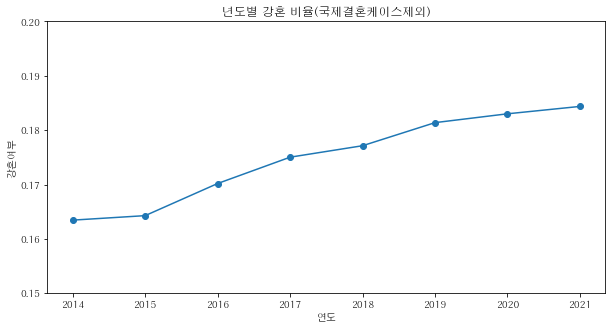

In [54]:
plt.figure(figsize=(10,5),facecolor= 'white')
title('년도별 강혼 비율(국제결혼케이스제외)')
xlabel('연도')
ylabel('강혼여부')
x=range(2014,2022)
y = list4
plt.ylim(0.15,0.2)
plot(x, y, marker="o")
plt.show()

<연상혼을 중심으로 EDA>

In [64]:
print(len(dfa[dfa['연상혼여부'] == 1]))

309233


In [63]:
a = dfa[dfa['아내수도권여부'] ==1].groupby('연상혼여부')['아내수도권여부'].count()
b = dfa[dfa['아내수도권여부'] ==0].groupby('연상혼여부')['아내수도권여부'].count()
c = dfa.groupby('연상혼여부')['아내수도권여부'].mean()
d = pd.merge(a,b,on= '연상혼여부')
d = pd.merge(c,d,on= '연상혼여부')
d

,아내수도권여부,아내수도권여부_x,아내수도권여부_y
연상혼여부,,,
0.00000,0.49750,710510,717658
1.00000,0.51555,159424,149809


In [67]:
a = dfa[dfa['남편수도권여부'] ==1].groupby('연상혼여부')['남편수도권여부'].count()
b = dfa[dfa['남편수도권여부'] ==0].groupby('연상혼여부')['남편수도권여부'].count()
c = dfa.groupby('연상혼여부')['남편수도권여부'].mean()
d = pd.merge(a,b,on= '연상혼여부')
d = pd.merge(c,d,on= '연상혼여부')
m = 155855/731579
n = 153378/696589
d.loc[3] = [0,m,n]
d

,남편수도권여부,남편수도권여부_x,남편수도권여부_y
연상혼여부,,,
0.00000,0.51225,731579.00000,696589.00000
1.00000,0.50401,155855.00000,153378.00000
3.00000,0.00000,0.21304,0.22018


In [71]:
a = dfa[dfa['아내고졸여부'] ==1].groupby('연상혼여부')['아내고졸여부'].count()
b = dfa[dfa['아내고졸여부'] ==0].groupby('연상혼여부')['아내고졸여부'].count()
c = dfa.groupby('연상혼여부')['아내고졸여부'].mean()
d = pd.merge(a,b,on= '연상혼여부')
d = pd.merge(c,d,on= '연상혼여부')
print(d)
a = dfa[dfa['아내대졸여부'] ==1].groupby('연상혼여부')['아내대졸여부'].count()
b = dfa[dfa['아내대졸여부'] ==0].groupby('연상혼여부')['아내대졸여부'].count()
c = dfa.groupby('연상혼여부')['아내대졸여부'].mean()
d = pd.merge(a,b,on= '연상혼여부')
d = pd.merge(c,d,on= '연상혼여부')
print(d)
a = dfa[dfa['아내대학원졸여부'] ==1].groupby('연상혼여부')['아내대학원졸여부'].count()
b = dfa[dfa['아내대학원졸여부'] ==0].groupby('연상혼여부')['아내대학원졸여부'].count()
c = dfa.groupby('연상혼여부')['아내대학원졸여부'].mean()
d = pd.merge(a,b,on= '연상혼여부')
d = pd.merge(c,d,on= '연상혼여부')
print(d)

         아내고졸여부  아내고졸여부_x  아내고졸여부_y
연상혼여부                              
0.00000 0.23565    336553   1091615
1.00000 0.28596     88427    220806
         아내대졸여부  아내대졸여부_x  아내대졸여부_y
연상혼여부                              
0.00000 0.65559    936299    491869
1.00000 0.59195    183052    126181
         아내대학원졸여부  아내대학원졸여부_x  아내대학원졸여부_y
연상혼여부                                    
0.00000   0.07226      103197     1324971
1.00000   0.07784       24070      285163


In [72]:
a = dfa[dfa['남편고졸여부'] ==1].groupby('연상혼여부')['남편고졸여부'].count()
b = dfa[dfa['남편고졸여부'] ==0].groupby('연상혼여부')['남편고졸여부'].count()
c = dfa.groupby('연상혼여부')['남편고졸여부'].mean()
d = pd.merge(a,b,on= '연상혼여부')
d = pd.merge(c,d,on= '연상혼여부')
print(d)
a = dfa[dfa['남편대졸여부'] ==1].groupby('연상혼여부')['남편대졸여부'].count()
b = dfa[dfa['남편대졸여부'] ==0].groupby('연상혼여부')['남편대졸여부'].count()
c = dfa.groupby('연상혼여부')['남편대졸여부'].mean()
d = pd.merge(a,b,on= '연상혼여부')
d = pd.merge(c,d,on= '연상혼여부')
print(d)
a = dfa[dfa['남편대학원졸여부'] ==1].groupby('연상혼여부')['남편대학원졸여부'].count()
b = dfa[dfa['남편대학원졸여부'] ==0].groupby('연상혼여부')['남편대학원졸여부'].count()
c = dfa.groupby('연상혼여부')['남편대학원졸여부'].mean()
d = pd.merge(a,b,on= '연상혼여부')
d = pd.merge(c,d,on= '연상혼여부')
print(d)

         남편고졸여부  남편고졸여부_x  남편고졸여부_y
연상혼여부                              
0.00000 0.25819    368743   1059425
1.00000 0.33244    102800    206433
         남편대졸여부  남편대졸여부_x  남편대졸여부_y
연상혼여부                              
0.00000 0.62870    897894    530274
1.00000 0.56880    175891    133342
         남편대학원졸여부  남편대학원졸여부_x  남편대학원졸여부_y
연상혼여부                                    
0.00000   0.08249      117807     1310361
1.00000   0.06076       18788      290445


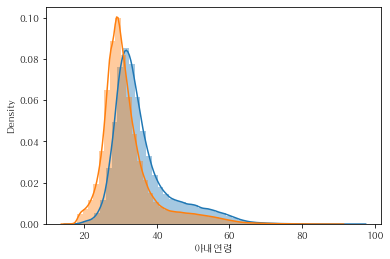

In [74]:
sns.distplot(dfa[dfa['연상혼여부'] == 1]['아내연령'])
sns.distplot(dfa[dfa['연상혼여부'] == 0]['아내연령'])
plt.show()

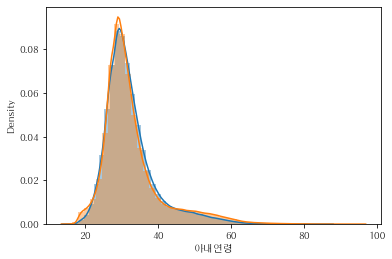

In [90]:
sns.distplot(dfa[dfa['강혼여부'] == 1]['아내연령'])
sns.distplot(dfa[dfa['강혼여부'] == 0]['아내연령'])
plt.show()

In [80]:
a = dfa[dfa['남편국제결혼여부'] ==1].groupby('연상혼여부')['남편국제결혼여부'].count()
b = dfa[dfa['남편국제결혼여부'] ==0].groupby('연상혼여부')['남편국제결혼여부'].count()
c = dfa.groupby('연상혼여부')['남편국제결혼여부'].mean()
d = pd.merge(a,b,on= '연상혼여부')
d = pd.merge(c,d,on= '연상혼여부')
# m = 155855/731579
# n = 153378/696589
# d.loc[3] = [0,m,n]
d

,남편국제결혼여부,남편국제결혼여부_x,남편국제결혼여부_y
연상혼여부,,,
0.00000,0.01657,23669,1404499
1.00000,0.03652,11294,297939


In [81]:
a = dfa[dfa['아내국제결혼여부'] ==1].groupby('연상혼여부')['아내국제결혼여부'].count()
b = dfa[dfa['아내국제결혼여부'] ==0].groupby('연상혼여부')['아내국제결혼여부'].count()
c = dfa.groupby('연상혼여부')['아내국제결혼여부'].mean()
d = pd.merge(a,b,on= '연상혼여부')
d = pd.merge(c,d,on= '연상혼여부')
# m = 155855/731579
# n = 153378/696589
# d.loc[3] = [0,m,n]
d

,아내국제결혼여부,아내국제결혼여부_x,아내국제결혼여부_y
연상혼여부,,,
0.00000,0.06411,91554,1336614
1.00000,0.03980,12307,296926


In [ ]:
a = dfa[dfa['아내국제결혼여부'] ==1].groupby('연상혼여부')['아내국제결혼여부'].count()
b = dfa[dfa['아내국제결혼여부'] ==0].groupby('연상혼여부')['아내국제결혼여부'].count()
c = dfa.groupby('연상혼여부')['아내국제결혼여부'].mean()
d = pd.merge(a,b,on= '연상혼여부')
d = pd.merge(c,d,on= '연상혼여부')
# m = 155855/731579
# n = 153378/696589
# d.loc[3] = [0,m,n]
d